In [7]:
from keras.datasets import mnist
from matplotlib import pyplot
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.cluster import KMeans
import numpy as np
import random
from sklearn.utils import shuffle
from sklearn.metrics import pairwise_distances_argmin_min
import matplotlib.pyplot as plt
import math

In [2]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [3]:
train_X_flatten = []
for row in train_X:
    train_X_flatten.append(row.flatten())
    
test_X_flatten = []
for row in test_X:
    test_X_flatten.append(row.flatten())

In [4]:
def separate_data(X, y):
    labelled_data = {key: [] for key in range(10)}
    for i in range(len(X)):
        labelled_data[y[i]].append(X[i])
    return labelled_data

In [5]:
labelled_data_train = separate_data(train_X_flatten, train_y)

In [6]:
M_values = [1000, 2500, 5000, 7500, 10000, 12500]

In [8]:
accuracies_proto = []
for M in M_values:
    points_per_class = int(M/10)
    prototyped_X_train = []
    prototyped_y_train = []
    for i in range(10):
        data = labelled_data_train[i]
        kmeans = KMeans(n_clusters=points_per_class).fit(data)
        closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, data)
        for j in closest:
            prototyped_X_train.append(data[j])
            prototyped_y_train.append(i)
            
    prototyped_X_train, prototyped_y_train = shuffle(prototyped_X_train, prototyped_y_train)
    print(len(prototyped_X_train), len(prototyped_y_train))
    nn_prototype = KNeighborsClassifier(n_neighbors=1).fit(prototyped_X_train, prototyped_y_train)
    y_pred = nn_prototype.predict(test_X_flatten)
    acc = accuracy_score(test_y, y_pred)
    print('Accuracy:', acc)
    accuracies_proto.append(acc)
    

1000 1000
Accuracy: 0.9263
2500 2500
Accuracy: 0.9418
5000 5000
Accuracy: 0.9502
7500 7500
Accuracy: 0.9517
10000 10000
Accuracy: 0.9558
12500 12500
Accuracy: 0.9557


In [10]:
accuracies_random = []
ci = []
for M in M_values:
    accuracy_random = 0
    num_trials = 25
    acc_scores = []
    for i in range(num_trials):
        random_training_index = set()
        while (len(random_training_index)<M):
            random_training_index.add(random.randint(0, 60000-1))

        random_X_train = []
        random_y_train = []
        for index in random_training_index:
            random_X_train.append(train_X_flatten[index])
            random_y_train.append(train_y[index])

        nn_random = KNeighborsClassifier(n_neighbors=1).fit(random_X_train, random_y_train)
        y_pred = nn_random.predict(test_X_flatten)
        a_r = accuracy_score(test_y, y_pred)
        accuracy_random += a_r
        acc_scores.append(a_r)

    accuracies_random.append(accuracy_random/num_trials)
    s = 0.95*np.std(acc_scores)/math.sqrt(25)
    ci.append(0.95*np.std(acc_scores)/math.sqrt(25))
    print('Accuracy:', accuracy_random/num_trials, s)

Accuracy: 0.88554 0.0009523530857827889
Accuracy: 0.9178400000000001 0.00044279376689379985


KeyboardInterrupt: 

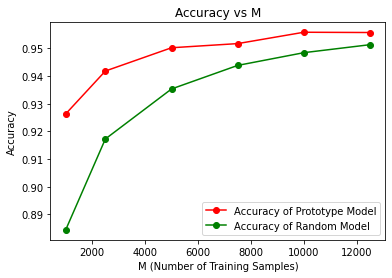

In [12]:
plt.plot(M_values, accuracies_proto, color='r', label='Accuracy of Prototype Model', marker = 'o')
plt.plot(M_values, accuracies_random, color='g', label='Accuracy of Random Model', marker = 'o')
plt.xlabel('M (Number of Training Samples)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs M')
plt.legend()
plt.show()

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

#some example data
x = M_values
y = accuracies_random
fig, ax = plt.subplots()
ax.plot(x,y)
ax.fill_between(x, (y-max(ci)), (y+max(ci)), color='b', alpha=.1)
plt.show()